##ingest

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/nlp.csv")

In [0]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


##EDA

In [0]:
text_only = df[['comment_text']]

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from imageio import imread
import matplotlib.pyplot as plt

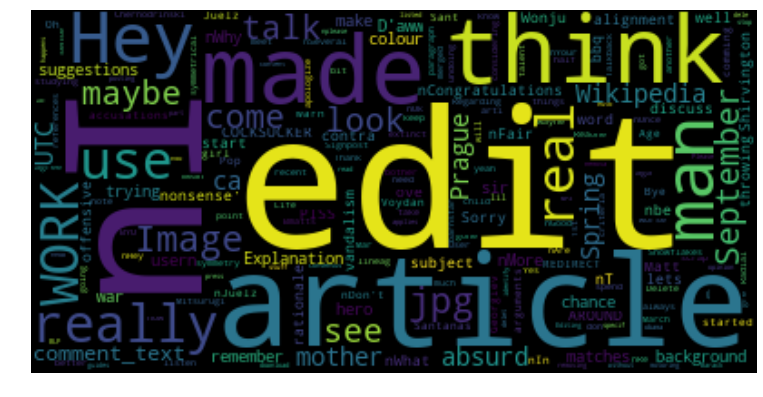

In [0]:
picture = WordCloud(repeat=True,background_color="black").generate(str(text_only))
plt.figure(figsize=[13,13])
plt.imshow(picture, interpolation="bilinear")
plt.axis("off")
plt.show()

##GCP API

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!export GOOGLE_APPLICATION_CREDENTIALS="/content/gdrive/My\ Drive/vision-973b04e0b0bf.json"
!gcloud auth activate-service-account --key-file /content/gdrive/My\ Drive/vision-973b04e0b0bf.json

Activated service account credentials for: [flower-case@vision-232900.iam.gserviceaccount.com]


In [0]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/gdrive/My Drive/vision-973b04e0b0bf.json"

In [0]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [0]:
#comment 1
text = "Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [0]:
client = language.LanguageServiceClient()
document = types.Document(
       content=text,
       type=enums.Document.Type.PLAIN_TEXT)
entities = client.analyze_entities(document).entities

response = client.analyze_sentiment(document)
sentiment = response.document_sentiment
print('Sentiment Score: {}'.format(sentiment.score))
print('Magnitude: {}'.format(sentiment.magnitude))

Sentiment Score: -0.5
Magnitude: 1.0


In [0]:
#comment 2
text = "Awesome! Then I'll simply disregard your notice. Thanks!"

In [37]:
client = language.LanguageServiceClient()
document = types.Document(
       content=text,
       type=enums.Document.Type.PLAIN_TEXT)
entities = client.analyze_entities(document).entities

response = client.analyze_sentiment(document)
sentiment = response.document_sentiment
print('Sentiment Score: {}'.format(sentiment.score))
print('Magnitude: {}'.format(sentiment.magnitude))

Sentiment Score: 0.20000000298023224
Magnitude: 1.5


##AWS API

###Sentiment Analysis Simple Sentence

In [0]:
!mkdir -p ~/.aws &&\
  cat /content/gdrive/My\ Drive/credentials.txt > ~/.aws/credentials

In [0]:
import boto3
comprehend = boto3.client(service_name='comprehend', region_name="us-east-1")

In [0]:
import json
text = "Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."
print('Calling DetectSentiment')
print(json.dumps(comprehend.detect_sentiment(Text=text, LanguageCode='en'), sort_keys=True, indent=4))
print('End of DetectSentiment\n')

Calling DetectSentiment
{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "connection": "keep-alive",
            "content-length": "163",
            "content-type": "application/x-amz-json-1.1",
            "date": "Mon, 11 Mar 2019 23:57:09 GMT",
            "x-amzn-requestid": "61ecaef5-4459-11e9-a74a-7b39e414910c"
        },
        "HTTPStatusCode": 200,
        "RequestId": "61ecaef5-4459-11e9-a74a-7b39e414910c",
        "RetryAttempts": 0
    },
    "Sentiment": "NEUTRAL",
    "SentimentScore": {
        "Mixed": 0.007020511198788881,
        "Negative": 0.4577677845954895,
        "Neutral": 0.5341091752052307,
        "Positive": 0.0011024771956726909
    }
}
End of DetectSentiment



In [42]:
text = "Awesome! Then I'll simply disregard your notice. Thanks!"
print('Calling DetectSentiment')
print(json.dumps(comprehend.detect_sentiment(Text=text, LanguageCode='en'), sort_keys=True, indent=4))
print('End of DetectSentiment\n')

Calling DetectSentiment
{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "connection": "keep-alive",
            "content-length": "163",
            "content-type": "application/x-amz-json-1.1",
            "date": "Tue, 12 Mar 2019 23:27:19 GMT",
            "x-amzn-requestid": "6133f10c-451e-11e9-a4bd-e5f34cbb5f73"
        },
        "HTTPStatusCode": 200,
        "RequestId": "6133f10c-451e-11e9-a4bd-e5f34cbb5f73",
        "RetryAttempts": 0
    },
    "Sentiment": "POSITIVE",
    "SentimentScore": {
        "Mixed": 0.06198837235569954,
        "Negative": 0.021236242726445198,
        "Neutral": 0.06441792845726013,
        "Positive": 0.8523574471473694
    }
}
End of DetectSentiment



###Sentiment Analysis on Entire Column

In [0]:
df_column = df[["comment_text"]]

In [0]:
df_column = ', '.join(map(str, df_column))

In [0]:
print(json.dumps(comprehend.detect_sentiment(Text=df_column, LanguageCode='en'), sort_keys=True, indent=4))

{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "connection": "keep-alive",
            "content-length": "163",
            "content-type": "application/x-amz-json-1.1",
            "date": "Tue, 12 Mar 2019 00:37:25 GMT",
            "x-amzn-requestid": "01975f6d-445f-11e9-b128-8dc58a2619c7"
        },
        "HTTPStatusCode": 200,
        "RequestId": "01975f6d-445f-11e9-b128-8dc58a2619c7",
        "RetryAttempts": 0
    },
    "Sentiment": "NEUTRAL",
    "SentimentScore": {
        "Mixed": 0.0056429593823850155,
        "Negative": 0.02273302711546421,
        "Neutral": 0.8986676931381226,
        "Positive": 0.07295633852481842
    }
}


##Conclusion:
Comparing these two sentences, I think the AWS is the better one, which point out the final sentiment analysis result instead of only numbers. And this is very helpful for user to utilize its platform to do machine learning. Meanwhile, the result of AWS and GCP are not exactly same with each other. And in my opinion, I think the AWS’s analysis result is more accurate than the GCP one. Hence, in the future, I would like to utilize AWS API to do the sentiment analysis.
